# Visualization

## Import relevant libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

## Load data

In [2]:
# setup data path
base_path = os.path.join('..', 'datasets')
ac_df_path = os.path.join(base_path, 'processed_data', 'area_chart.csv')
sc_df_path = os.path.join(base_path, 'processed_data', 'slope_chart.csv')

In [3]:
# load datasets
ac_df = pd.read_csv(ac_df_path)
sc_df = pd.read_csv(sc_df_path, header = [0,1], index_col = [0,1])

## Area Chart

In [4]:
ac_df.head()

,month,month_name,year,price,price_pct_change
0,1,Jan,2014,938.888159,0.0
1,1,Jan,2015,1011.513659,0.0
2,1,Jan,2016,977.669773,0.0
3,1,Jan,2017,1054.820534,0.0
4,1,Jan,2018,1115.220955,0.0


In [5]:
# populate tables for visualization
for year in ac_df.year.unique():
    var_name = '_'.join(['ac_df', str(year)])
    vars()[var_name] = ac_df[ac_df['year'] == year]
    print('A variable `{}` was created!'.format(var_name))

A variable `ac_df_2014` was created!
A variable `ac_df_2015` was created!
A variable `ac_df_2016` was created!
A variable `ac_df_2017` was created!
A variable `ac_df_2018` was created!


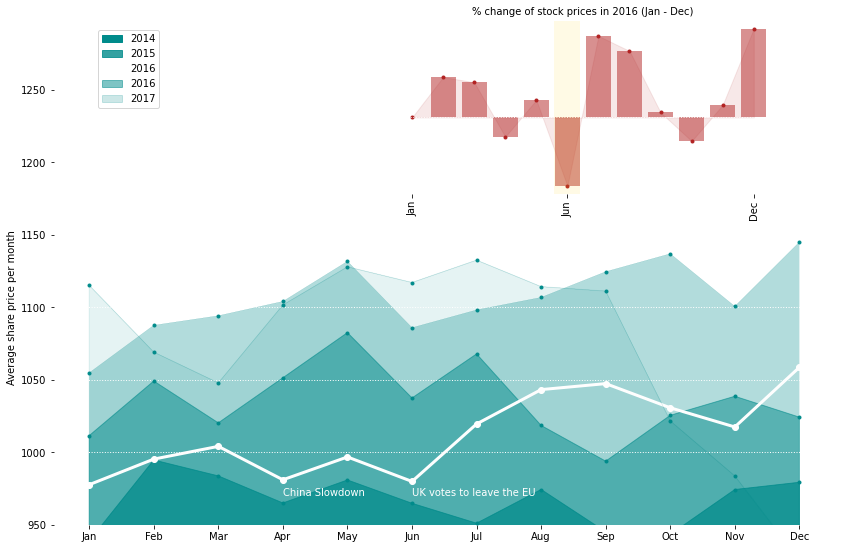

In [6]:
# create a figure
fig = plt.figure(figsize = (14, 8))

# customize subplot
ax1 = fig.add_subplot(1, 1, 1)
ax2 = fig.add_axes([0.45, 0.7, 0.4, 0.3])
ax1.set_ylim(950, 1250)


# setting up ax1

# populate plots
# 2014
ax1.plot(ac_df_2014['month_name'], ac_df_2014['price'], color= "darkcyan", marker = '.', linewidth = 0.1)
ax1.fill_between(ac_df_2014['month_name'], ac_df_2014['price'], color = 'darkcyan', alpha = 0.7)
# 2015
ax1.plot(ac_df_2015['month_name'], ac_df_2015['price'], color= "darkcyan", marker = '.', linewidth = 0.1)
ax1.fill_between(ac_df_2015['month_name'], ac_df_2015['price'], color = 'darkcyan', alpha = 0.5)
# 2016
ax1.plot(ac_df_2016['month_name'], ac_df_2016['price'], color="white", alpha=2, marker = 'o', linewidth = 3)
# 2017
ax1.plot(ac_df_2017['month_name'], ac_df_2017['price'], color="darkcyan", marker = '.', linewidth = 0.1)
ax1.fill_between(ac_df_2017['month_name'], ac_df_2017['price'], alpha = 0.3, facecolor = 'darkcyan')
# 2018
ax1.plot(ac_df_2018['month_name'], ac_df_2018['price'], color= "darkcyan", marker = '.', linewidth = 0.1)
ax1.fill_between(ac_df_2018['month_name'], ac_df_2018['price'], color = 'darkcyan', alpha = 0.1)

# label events
ax1.annotate("UK votes to leave the EU", ('Jun', 970), color = 'white') #will need to add arrows
ax1.annotate("China Slowdown", ('Apr', 970),  color = 'white')

# set label
ax1.set_ylabel("Average share price per month")

# set legends
dca_patch = mpatches.Patch(color='darkcyan', alpha = 0.1, label='2018')
dca1_patch = mpatches.Patch(color='darkcyan', alpha = 0.2, label='2017')
dca2_patch = mpatches.Patch(color='darkcyan', alpha = 0.5, label='2016')
dca3_patch = mpatches.Patch(color='darkcyan', alpha = 0.8, label='2015')
dca4_patch = mpatches.Patch(color='darkcyan', alpha = 1, label='2014')
white_patch = mpatches.Patch(color='white' ,label='2016')
ax1.legend(handles=[dca4_patch, dca3_patch,  white_patch, dca2_patch, dca1_patch],
         loc='upper left', bbox_to_anchor=(0.05, 1.15))

ax1.grid(axis='y', color = 'white', linewidth = 1, alpha = 1, ls = ':')

# remove spines
for spine in ['left', 'right', 'top', 'bottom']:
    ax1.spines[spine].set_visible(False)

    
# setting up ax2

# populate plots
ax2.bar(ac_df_2016['month_name'], ac_df_2016['price_pct_change'], 
        color = 'firebrick', linewidth = 0.5, alpha = 0.5)
ax2.fill_between(ac_df_2016['month_name'], ac_df_2016['price_pct_change'], 
                 color = 'firebrick', alpha = 0.1)
ax2.plot(ac_df_2016['month_name'], ac_df_2016['price_pct_change'], 
         'ro', color = 'firebrick', marker = '.')
ax2.grid(axis='y', color = 'white', linewidth = 1, alpha = 1, ls = ':')

ax2.axhline(linewidth=1, color='white', alpha=0.9, ls= ':') ### what is this line for?
# label brexit referendum period
ax2.axvline(x='Jun',linewidth=26, alpha=0.1, color='gold') ### just realized this label when reading the code 
### at first I don't know what this gold bar mean

ax2.set_title("% change of stock prices in 2016 (Jan - Dec)", size = 10)
ax2.set_ylabel

# set tick labels
my_xticks = ax2.get_xticks()
plt.xticks([my_xticks[0], my_xticks[5], my_xticks[-1]], visible=True, rotation="vertical")
plt.yticks(visible=False)
ax2.axes.yaxis.set_visible(False) ### the tick on y-axis, you want to leave it or you forgot to remove it?

# remove spines
for spine in ['left', 'right', 'top', 'bottom']:
    ax2.spines[spine].set_visible(False)
    
# save plot
path = os.path.join('output', 'area_chart.png')
plt.savefig(path)

plt.show()

## Slope Chart

In [7]:
sc_df.reset_index(inplace = True)
sc_df

country                  sector debt_to_assets_index              \
year                                                         2014        2015   
0             europe  consumer discretionary                100.0   94.193846   
1             europe        consumer staples                100.0   95.324571   
2             europe    energy and materials                100.0   98.750000   
3             europe              financials                100.0   97.414717   
4             europe             industrials                100.0   98.797313   
5             europe               utilities                100.0  104.912866   
6     united kingdom  consumer discretionary                100.0   91.259702   
7     united kingdom        consumer staples                100.0   99.544795   
8     united kingdom    energy and materials                100.0  127.037765   
9     united kingdom              financials                100.0   87.446716   
10    united kingdom             industrials                100.0  103.690129   
11    united kingdom               utilities                100.0  103.954229   

                                         debt_to_assets_pct_change            \
year        2016        2017        2018                      2015      2016   
0      84.921407   81.557524   87.860325                 -0.058062 -0.098440   
1     101.545025  104.369884  101.717975                 -0.046754  0.065256   
2     105.491453   98.753561   93.411681                 -0.012500  0.068268   
3      92.139405   93.617730   97.259980                 -0.025853 -0.054153   
4      98.174442   98.007004  104.344789                 -0.012027 -0.006305   
5     110.854653  113.283278   91.147571                  0.049129  0.056635   
6      94.271615   98.706442  102.032962                 -0.087403  0.033004   
7      94.013858   93.893007   89.602804                 -0.004552 -0.055562   
8     127.004308  113.454059  119.350926                  0.270378 -0.000263   
9      82.218356   88.029578   85.237060                 -0.125533 -0.059789   
10    106.904953  103.246863   99.167688                  0.036901  0.031004   
11    100.778534  103.248117  101.386877                  0.039542 -0.030549   

                         price_index                                      \
year      2017      2018        2014        2015        2016        2017   
0    -0.039612  0.077280       100.0  111.926466  117.846159  160.647777   
1     0.027819 -0.025409       100.0  112.962987  110.531877  122.578328   
2    -0.063871 -0.054093       100.0  110.537927  103.729369  126.562270   
3     0.016044  0.038906       100.0  118.114052  115.753761  132.508323   
4    -0.001706  0.064667       100.0  111.117650  104.457957  127.650986   
5     0.021908 -0.195401       100.0   84.954611   65.560702   68.785323   
6     0.047043  0.033701       100.0  118.297111  109.582503  116.097625   
7    -0.001285 -0.045692       100.0  112.888875  127.973442  142.741233   
8    -0.106691  0.051976       100.0   90.628475   89.457791   99.858144   
9     0.070680 -0.031723       100.0  113.359287  109.521622  138.944216   
10   -0.034218 -0.039509       100.0   91.297675   80.572448   88.256991   
11    0.024505 -0.018027       100.0  105.621257  109.767209  104.230080   

                 price_pct_change                                
year        2018             2015      2016      2017      2018  
0     190.444474         0.119265  0.052889  0.363199  0.185478  
1     123.808611         0.129630 -0.021521  0.108986  0.010037  
2     124.532624         0.105379 -0.061595  0.220120 -0.016037  
3     137.712780         0.181141 -0.019983  0.144743  0.039276  
4     127.887518         0.111177 -0.059934  0.222032  0.001853  
5      74.599012        -0.150454 -0.228286  0.049185  0.084519  
6     111.471692         0.182971 -0.073667  0.059454 -0.039845  
7     131.597105         0.128889  0.133623  0.115397 -0.078072  
8     106.776066        -0.09371

In [8]:
# populate tables for visualization
for country in sc_df.country.unique():
    df = sc_df[sc_df['country'] == country]
    for value in ['debt_to_assets', 'price']:
        index = '_'.join([value, 'index'])
        pct = '_'.join([value, 'pct_change'])
        table = pd.concat([df['sector'], df[index], df[pct, '2017']], 
                          axis = 1)
        table.rename(columns = {table.columns[-1]: 'pct_change2016_17'}, inplace = True)
        if country == 'europe':
            var_name = '_'.join(['eu', value])
        elif country == 'united kingdom':
            var_name = '_'.join(['uk', value])
        vars()[var_name] = table
        print('A variable `{}` was created!'.format(var_name))

A variable `eu_debt_to_assets` was created!
A variable `eu_price` was created!
A variable `uk_debt_to_assets` was created!
A variable `uk_price` was created!


In [9]:
uk_debt_to_assets

,sector,2014,2015,2016,2017,2018,pct_change2016_17
6,consumer discretionary,100.0,91.259702,94.271615,98.706442,102.032962,0.047043
7,consumer staples,100.0,99.544795,94.013858,93.893007,89.602804,-0.001285
8,energy and materials,100.0,127.037765,127.004308,113.454059,119.350926,-0.106691
9,financials,100.0,87.446716,82.218356,88.029578,85.237060,0.070680
10,industrials,100.0,103.690129,106.904953,103.246863,99.167688,-0.034218
11,utilities,100.0,103.954229,100.778534,103.248117,101.386877,0.024505


In [10]:
#style
plt.style.use('fivethirtyeight')

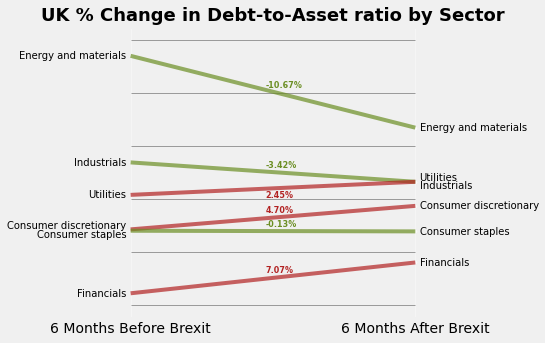

In [11]:
""" UK: Debt to Asset Ratio """

table = uk_debt_to_assets

# create a figure
fig = plt.figure(figsize = (5, 5))

# initiate a subplot
ax = fig.add_subplot(1, 1, 1)

# generate scatter plots (coordinate for line)
ax.scatter(y=table['2016'], x=np.repeat(1, table.shape[0]),
            s=10, color='w', alpha=0.7)
ax.scatter(y=table['2017'], x=np.repeat(3, table.shape[0]),
            s=10, color='w', alpha=0.7)

# define a function to draw a line
def drawline(p1, p2):
    ax = plt.gca()
    l = mlines.Line2D([p1[0], p2[0]], [p1[1], p2[1]],
                        color='olivedrab' if p1[1] - p2[1] > 0 else 'firebrick', alpha=0.7)
    ax.add_line(l)
    return l

for y1, y2, c, p in zip(table['2016'], table['2017'],
                        table['sector'], table['pct_change2016_17']):
    drawline([1, y1], [3, y2])

# label sectors on the left axis
# define adjusted coordinates
x_adj = [-0.03, -0.03, -0.03, -0.03, -0.03, -0.03]
y_adj = [0.75, -0.75, 0, 0, 0, 0]
for i, sector in enumerate(table.sector):
    ax.text(x = 1 + x_adj[i], 
            y = table[table['sector'] == sector]['2016'] + y_adj[i], 
            s = sector.capitalize(), 
            horizontalalignment='right',
            verticalalignment='center',
            fontdict={'size': 10})

# label sectors on the right axis
# define adjusted coordinates
x_adj = [0.03, 0.03, 0.03, 0.03, 0.03, 0.03]
y_adj = [0, 0, 0, 0, -0.75, 0.75]
for i, sector in enumerate(table.sector):
    ax.text(x = 3 + x_adj[i], 
            y = table[table['sector'] == sector]['2017'] + y_adj[i], 
            s = sector.capitalize(), 
            horizontalalignment='left',
            verticalalignment='center',
            fontdict={'size': 10})
    
#loop to get middle point
mean = []
for i, j in zip(table['2016'], table['2017']):
    m = np.mean((i, j))
    mean.append(m)

# label percentage change
# define adjusted coordinates and colors
x_adj = [-0.05, -0.05, -0.05, -0.05, -0.05, -0.05]
y_adj = [1.5, 1.25, 1.25, 1.5, 1.25, -1.25]
colors = ['firebrick', 'olivedrab', 'olivedrab', 'firebrick', 'olivedrab', 'firebrick']
for i, pct in enumerate(table.pct_change2016_17):
    ax.text(x = 2 + x_adj[i],
            y = mean[i] + y_adj[i],
            s = '{:.2f}%'.format(pct * 100), 
            horizontalalignment='left',
            verticalalignment='center',
            color = colors[i],
            fontdict={'size': 8, 'weight': 700})
    
# Aesthetics
ax.set_title('UK % Change in Debt-to-Asset ratio by Sector',
            fontdict={'size': 18, 'weight': 'bold'})
ax.set_xticks([1, 3])
ax.set_xticklabels(['6 Months Before Brexit', '6 Months After Brexit'])

#set y axis invisible
ax.axes.get_yaxis().set_visible(False)

# creat gridlines
ax.hlines(80, 1, 3, color='grey', linewidth=.75)
ax.hlines(90, 1, 3, color='grey', linewidth=.75)
ax.hlines(100, 1, 3, color='grey', linewidth=.75)
ax.hlines(110, 1, 3, color='grey', linewidth=.75)
ax.hlines(120, 1, 3, color='grey', linewidth=.75)
ax.hlines(130, 1, 3, color='grey', linewidth=.75)
ax.grid(color='whitesmoke', linestyle='-', linewidth=1)

# save plot
path = os.path.join('output', 'slope_chart_uk_d2a.png')
plt.savefig(path)

plt.show()

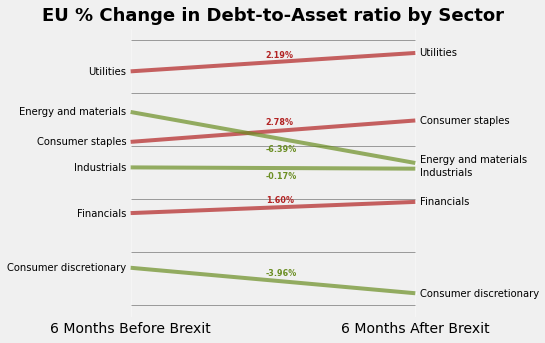

In [12]:
""" EU: Debt to Asset Ratio """

table = eu_debt_to_assets

# create a figure
fig = plt.figure(figsize = (5, 5))

# initiate a subplot
ax = fig.add_subplot(1, 1, 1)

# generate scatter plots (coordinate for line)
ax.scatter(y=table['2016'], x=np.repeat(1, table.shape[0]),
            s=10, color='w', alpha=0.7)
ax.scatter(y=table['2017'], x=np.repeat(3, table.shape[0]),
            s=10, color='w', alpha=0.7)

# define a function to draw a line
def drawline(p1, p2):
    ax = plt.gca()
    l = mlines.Line2D([p1[0], p2[0]], [p1[1], p2[1]],
                        color='olivedrab' if p1[1] - p2[1] > 0 else 'firebrick', alpha=0.7)
    ax.add_line(l)
    return l

for y1, y2, c, p in zip(table['2016'], table['2017'],
                        table['sector'], table['pct_change2016_17']):
    drawline([1, y1], [3, y2])

# label sectors on the left axis
# define adjusted coordinates
x_adj = [-0.03, -0.03, -0.03, -0.03, -0.03, -0.03]
y_adj = [0, 0, 0, 0, 0, 0]
for i, sector in enumerate(table.sector):
    ax.text(x = 1 + x_adj[i], 
            y = table[table['sector'] == sector]['2016'] + y_adj[i], 
            s = sector.capitalize(), 
            horizontalalignment='right',
            verticalalignment='center',
            fontdict={'size': 10})

# label sectors on the right axis
# define adjusted coordinates
x_adj = [0.03, 0.03, 0.03, 0.03, 0.03, 0.03]
y_adj = [0, 0, +0.5, 0, -0.5, 0]
for i, sector in enumerate(table.sector):
    ax.text(x = 3 + x_adj[i], 
            y = table[table['sector'] == sector]['2017'] + y_adj[i], 
            s = sector.capitalize(), 
            horizontalalignment='left',
            verticalalignment='center',
            fontdict={'size': 10})
    
#loop to get middle point
mean = []
for i, j in zip(table['2016'], table['2017']):
    m = np.mean((i, j))
    mean.append(m)

# label percentage change
# define adjusted coordinates and colors
x_adj = [-0.05, -0.05, -0.05, -0.05, -0.05, -0.05]
y_adj = [1, 1.2, -1.5, 1, -1, 1]
colors = ['olivedrab', 'firebrick', 'olivedrab', 'firebrick', 'olivedrab', 'firebrick']
for i, pct in enumerate(table.pct_change2016_17):
    ax.text(x = 2 + x_adj[i],
            y = mean[i] + y_adj[i],
            s = '{:.2f}%'.format(pct * 100), 
            horizontalalignment='left',
            verticalalignment='center',
            color = colors[i],
            fontdict={'size': 8, 'weight': 700})
    
# Aesthetics
ax.set_title('EU % Change in Debt-to-Asset ratio by Sector',
            fontdict={'size': 18, 'weight': 'bold'})
ax.set_xticks([1, 3])
ax.set_xticklabels(['6 Months Before Brexit', '6 Months After Brexit'])

#set y axis invisible
ax.axes.get_yaxis().set_visible(False)

# creat gridlines
ax.hlines(80, 1, 3, color='grey', linewidth=.75)
ax.hlines(87, 1, 3, color='grey', linewidth=.75)
ax.hlines(94, 1, 3, color='grey', linewidth=.75)
ax.hlines(101, 1, 3, color='grey', linewidth=.75)
ax.hlines(108, 1, 3, color='grey', linewidth=.75)
ax.hlines(115, 1, 3, color='grey', linewidth=.75)
ax.grid(color='whitesmoke', linestyle='-', linewidth=1)

# save plot
path = os.path.join('output', 'slope_chart_eu_d2a.png')
plt.savefig(path)

plt.show()

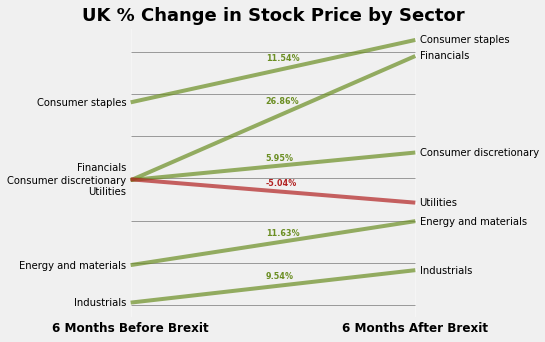

In [13]:
""" UK: Price """

table = uk_price

# create a figure
fig = plt.figure(figsize = (5, 5))

# initiate a subplot
ax = fig.add_subplot(1, 1, 1)

# generate scatter plots (coordinate for line)
ax.scatter(y=table['2016'], x=np.repeat(1, table.shape[0]),
            s=10, color='w', alpha=0.7)
ax.scatter(y=table['2017'], x=np.repeat(3, table.shape[0]),
            s=10, color='w', alpha=0.7)

# define a function to draw a line
def drawline(p1, p2):
    ax = plt.gca()
    l = mlines.Line2D([p1[0], p2[0]], [p1[1], p2[1]],
                        color='firebrick' if p1[1] - p2[1] > 0 else 'olivedrab', alpha=0.7)
    ax.add_line(l)
    return l

for y1, y2, c, p in zip(table['2016'], table['2017'],
                        table['sector'], table['pct_change2016_17']):
    drawline([1, y1], [3, y2])

# label sectors on the left axis
# define adjusted coordinates
x_adj = [-0.03, -0.03, -0.03, -0.03, -0.03, -0.03]
y_adj = [0, 0, 0, 3, 0, -3]
for i, sector in enumerate(table.sector):
    ax.text(x = 1 + x_adj[i], 
            y = table[table['sector'] == sector]['2016'] + y_adj[i], 
            s = sector.capitalize(), 
            horizontalalignment='right',
            verticalalignment='center',
            fontdict={'size': 10})

# label sectors on the right axis
# define adjusted coordinates
x_adj = [0.03, 0.03, 0.03, 0.03, 0.03, 0.03]
y_adj = [0, 0, 0, 0, 0, 0]
for i, sector in enumerate(table.sector):
    ax.text(x = 3 + x_adj[i], 
            y = table[table['sector'] == sector]['2017'] + y_adj[i], 
            s = sector.capitalize(), 
            horizontalalignment='left',
            verticalalignment='center',
            fontdict={'size': 10})
    
#loop to get middle point
mean = []
for i, j in zip(table['2016'], table['2017']):
    m = np.mean((i, j))
    mean.append(m)

# label percentage change
# define adjusted coordinates and colors
x_adj = [-0.05, -0.05, -0.05, -0.05, -0.05, -0.05]
y_adj = [2, 3, 2.5, 4, 2.5, 2]
colors = ['olivedrab', 'olivedrab', 'olivedrab', 'olivedrab', 'olivedrab', 'firebrick']
for i, pct in enumerate(table.pct_change2016_17):
    ax.text(x = 2 + x_adj[i],
            y = mean[i] + y_adj[i],
            s = '{:.2f}%'.format(pct * 100), 
            horizontalalignment='left',
            verticalalignment='center',
            color = colors[i],
            fontdict={'size': 8, 'weight': 700})
    
# Aesthetics
ax.set_title('UK % Change in Stock Price by Sector',
            fontdict={'size': 18, 'weight': 'bold'})
ax.set_xticks([1, 3])
ax.set_xticklabels(['6 Months Before Brexit', '6 Months After Brexit'],
            fontdict={'size': 12, 'weight': 'bold'})

#set y axis invisible
ax.axes.get_yaxis().set_visible(False)

# creat gridlines
ax.hlines(80, 1, 3, color='grey', linewidth=.75)
ax.hlines(90, 1, 3, color='grey', linewidth=.75)
ax.hlines(100, 1, 3, color='grey', linewidth=.75)
ax.hlines(110, 1, 3, color='grey', linewidth=.75)
ax.hlines(120, 1, 3, color='grey', linewidth=.75)
ax.hlines(130, 1, 3, color='grey', linewidth=.75)
ax.hlines(140, 1, 3, color='grey', linewidth=.75)
ax.grid(color='whitesmoke', linestyle='-', linewidth=1)

# save plot
path = os.path.join('output', 'slope_chart_uk_p.png')
plt.savefig(path)

plt.show()

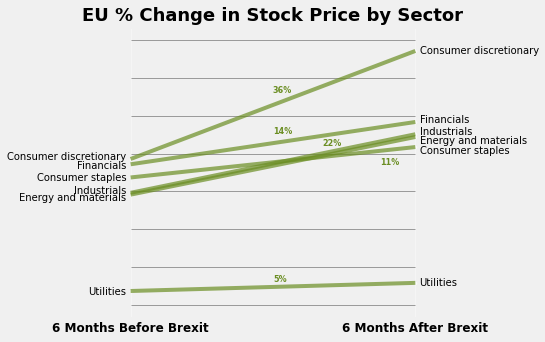

In [14]:
""" UK: Price """

table = eu_price

# create a figure
fig = plt.figure(figsize = (5, 5))

# initiate a subplot
ax = fig.add_subplot(1, 1, 1)

# generate scatter plots (coordinate for line)
ax.scatter(y=table['2016'], x=np.repeat(1, table.shape[0]),
            s=10, color='w', alpha=0.7)
ax.scatter(y=table['2017'], x=np.repeat(3, table.shape[0]),
            s=10, color='w', alpha=0.7)

# define a function to draw a line
def drawline(p1, p2):
    ax = plt.gca()
    l = mlines.Line2D([p1[0], p2[0]], [p1[1], p2[1]],
                        color='firebrick' if p1[1] - p2[1] > 0 else 'olivedrab', alpha=0.7)
    ax.add_line(l)
    return l

for y1, y2, c, p in zip(table['2016'], table['2017'],
                        table['sector'], table['pct_change2016_17']):
    drawline([1, y1], [3, y2])

# label sectors on the left axis
# define adjusted coordinates
x_adj = [-0.03, -0.03, -0.03, -0.03, -0.03, -0.03]
y_adj = [1, 0, -1.25, -0.5, 1, 0]
for i, sector in enumerate(table.sector):
    ax.text(x = 1 + x_adj[i], 
            y = table[table['sector'] == sector]['2016'] + y_adj[i], 
            s = sector.capitalize(), 
            horizontalalignment='right',
            verticalalignment='center',
            fontdict={'size': 10})

# label sectors on the right axis
# define adjusted coordinates
x_adj = [0.03, 0.03, 0.03, 0.03, 0.03, 0.03]
y_adj = [0, -1.5, -1.5, 1, 1, 0]
for i, sector in enumerate(table.sector):
    ax.text(x = 3 + x_adj[i], 
            y = table[table['sector'] == sector]['2017'] + y_adj[i], 
            s = sector.capitalize(), 
            horizontalalignment='left',
            verticalalignment='center',
            fontdict={'size': 10})
    
#loop to get middle point
mean = []
for i, j in zip(table['2016'], table['2017']):
    m = np.mean((i, j))
    mean.append(m)

# label percentage change
# define adjusted coordinates and colors
x_adj = [0, 0.75, 0.35, 0, 0, 0]
y_adj = [6, 0, 9, 5, 0, 3]
colors = ['olivedrab', 'olivedrab', 'olivedrab', 'olivedrab', 'pass', 'olivedrab']
for i, pct in enumerate(table.pct_change2016_17):
    if i != 4:
        ax.text(x = 2 + x_adj[i],
                y = mean[i] + y_adj[i],
                s = '{:.0f}%'.format(pct * 100), 
                horizontalalignment='left',
                verticalalignment='center',
                color = colors[i],
                fontdict={'size': 8, 'weight': 700})
    elif i == 4:
        pass
        
    
# Aesthetics
ax.set_title('EU % Change in Stock Price by Sector',
            fontdict={'size': 18, 'weight': 'bold'})
ax.set_xticks([1, 3])
ax.set_xticklabels(['6 Months Before Brexit', '6 Months After Brexit'],
            fontdict={'size': 12, 'weight': 'bold'})

#set y axis invisible
ax.axes.get_yaxis().set_visible(False)

# creat gridlines
ax.hlines(60, 1, 3, color='grey', linewidth=.75)
ax.hlines(75, 1, 3, color='grey', linewidth=.75)
ax.hlines(90, 1, 3, color='grey', linewidth=.75)
ax.hlines(105, 1, 3, color='grey', linewidth=.75)
ax.hlines(120, 1, 3, color='grey', linewidth=.75)
ax.hlines(135, 1, 3, color='grey', linewidth=.75)
ax.hlines(150, 1, 3, color='grey', linewidth=.75)
ax.hlines(165, 1, 3, color='grey', linewidth=.75)
ax.grid(color='whitesmoke', linestyle='-', linewidth=1)

# save plot
path = os.path.join('output', 'slope_chart_eu_p.png')
plt.savefig(path)

plt.show()